# Summarize free recall data using raster plots

We can get a quick overview of a full free recall dataset using Seaborn. We'll plot every recall attempt for every subject, sorted by list and output position.

In [1]:
import pkg_resources
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from psifr import fr
data_file = pkg_resources.resource_filename('psifr', 'data/Morton2013.csv')

## Load data and merge lists

In [2]:
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)

study = df.query('trial_type == "study"').copy()
recall = df.query('trial_type == "recall"').copy()
data = fr.merge_lists(study, recall, 
                      list_keys=['list_type', 'list_category'], 
                      study_keys=['category'])

## Plot recalls labeled by serial position

### Plot one participant

Items near the beginning of the list are purple, and items near the end are yellow. Items with no defined serial position (i.e., intrusions) are shown in magenta.

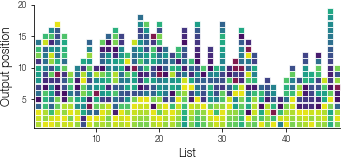

In [3]:
fig, ax = plt.subplots(figsize=(5, 2.5))
sns.scatterplot(x='list', y='output', hue='input', marker='s', ax=ax,
                palette=sns.color_palette('viridis', 24), 
                data=data.query('subject == 10'), legend=False)
sns.scatterplot(x='list', y='output', hue='input', marker='s', ax=ax, color=(.5, .1, .3),
                data=data.query('subject == 10 and intrusion'), legend=False)

ax.set_yticks(list(range(0, 25, 5)))
ax.set_xlim(0.25, 48.5);
ax.set_ylim(.5, 20);
ax.set_ylabel('Output position');
ax.set_xlabel('List');
fig.savefig('raster.png', dpi=300)

### Plot all participants

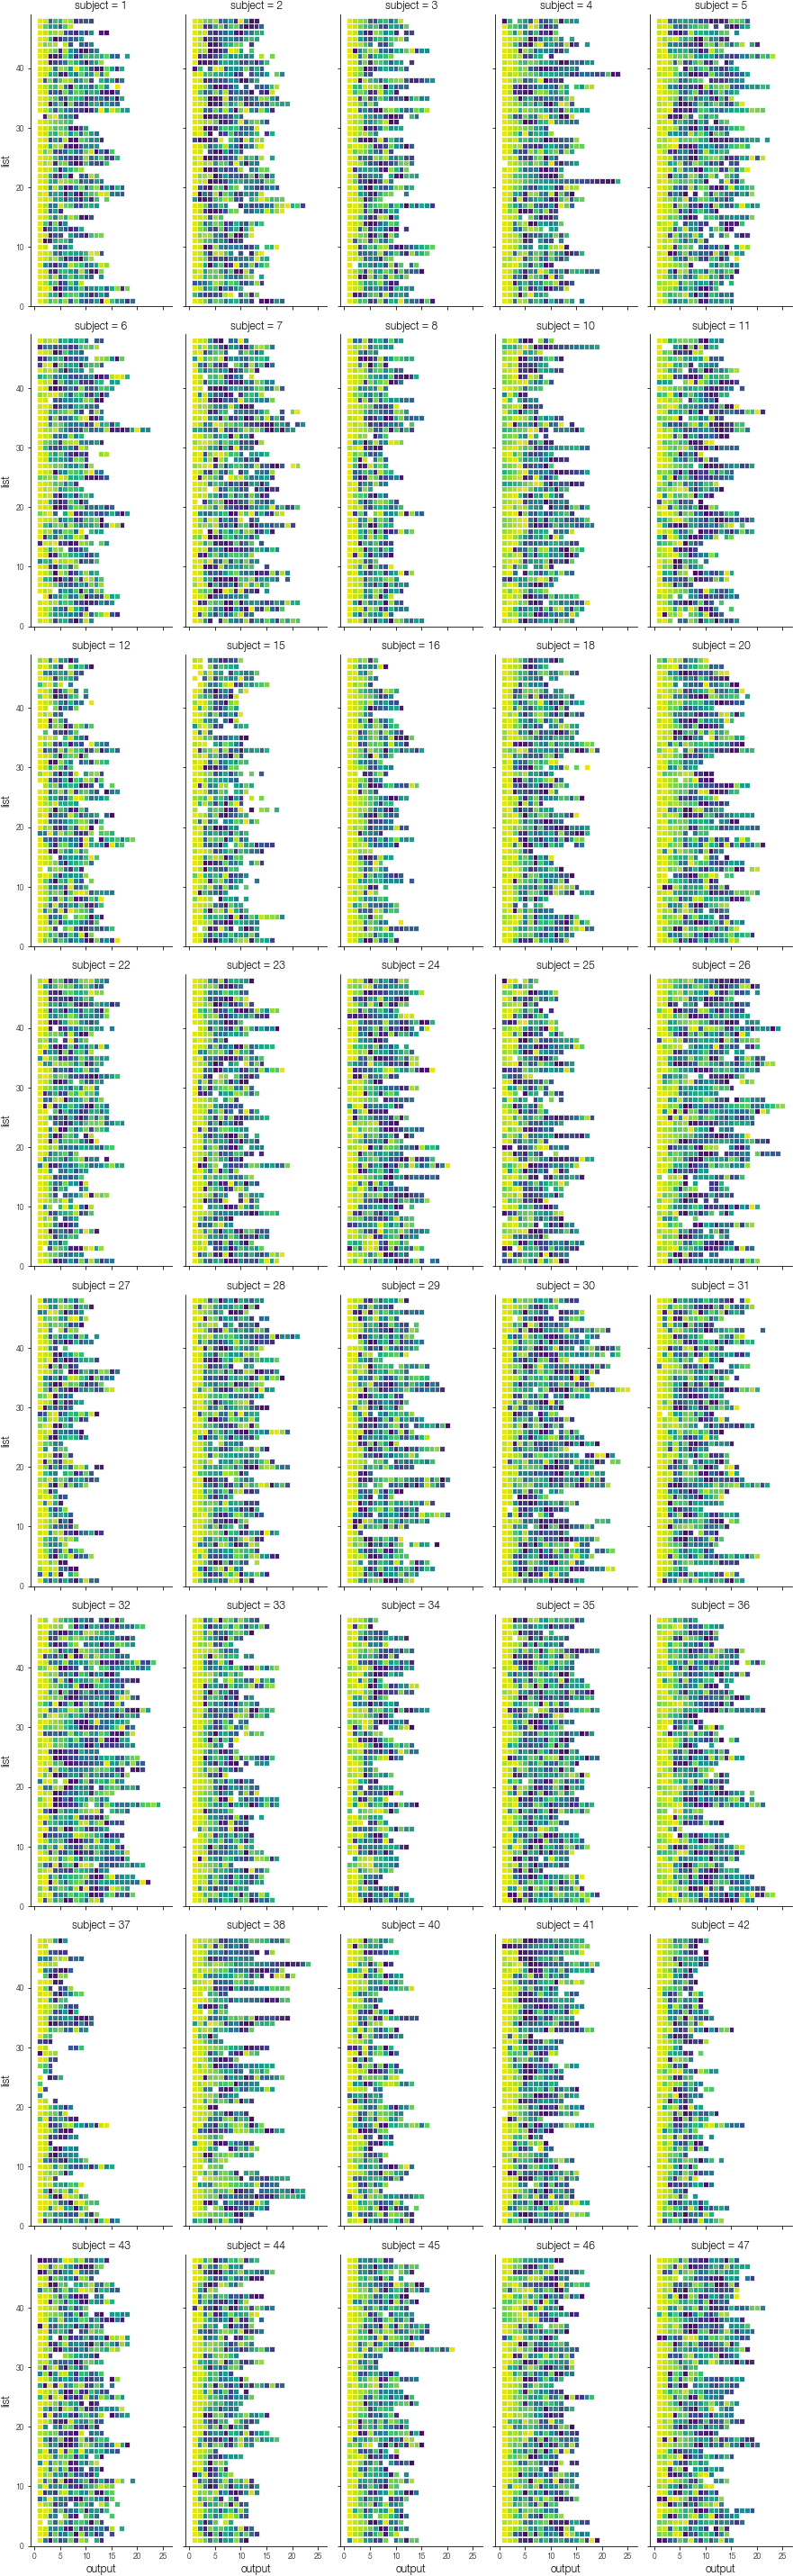

In [4]:
g = sns.relplot(kind='scatter', x='output', y='list', hue='input', 
                aspect=.5, marker='s',
                palette=sns.color_palette('viridis', 24),
                col='subject', col_wrap=5, data=data, legend=False);
g.set(ylim=(0, 49));

## Plot recalls labeled by stimulus category

Note that the lists included pure lists with all the same category and mixed lists with items from each of the three categories.

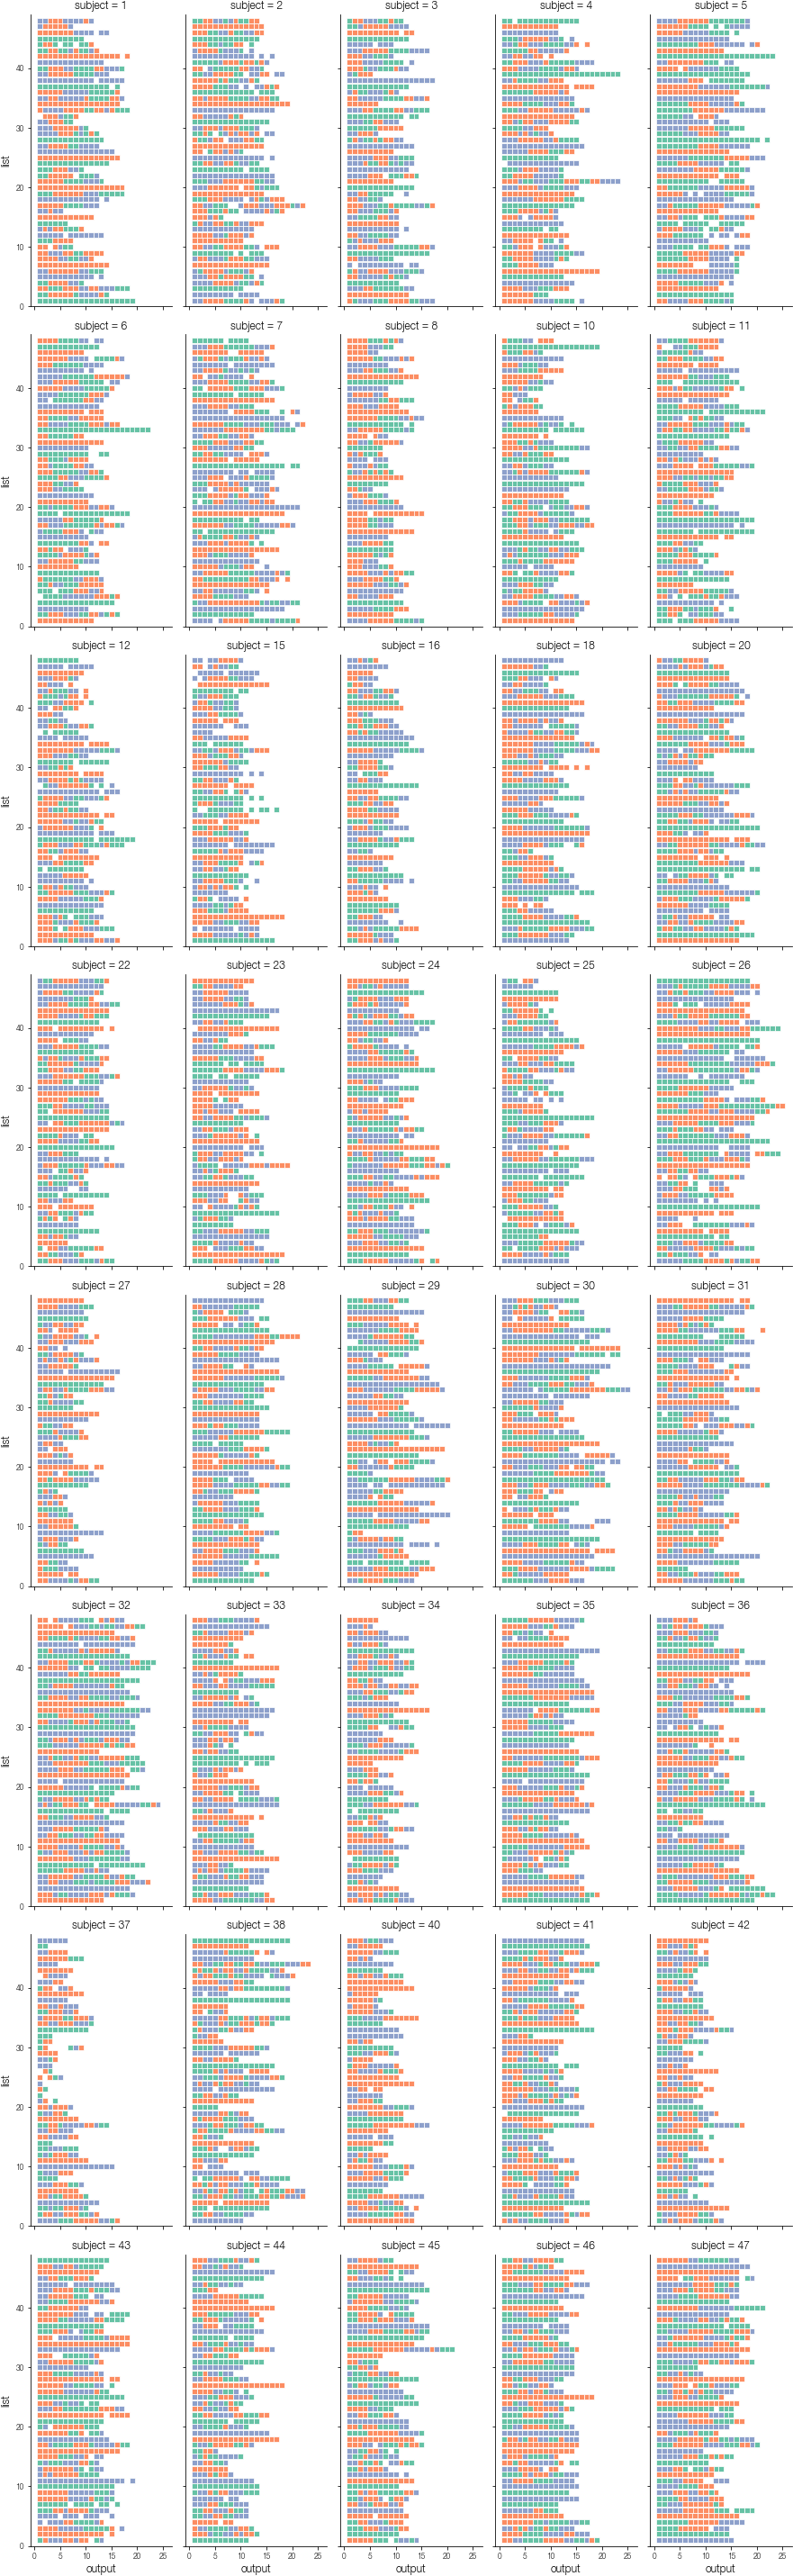

In [5]:
g = sns.relplot(kind='scatter', x='output', y='list', hue='category', 
                palette=sns.color_palette('Set2', 3), aspect=.5, marker='s',
                col='subject', col_wrap=5, data=data, legend=False);
g.set(ylim=(0, 49));